In [120]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
cat = cv2.imread('data\\PetImages\\train\\Cat\\4.jpg')
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

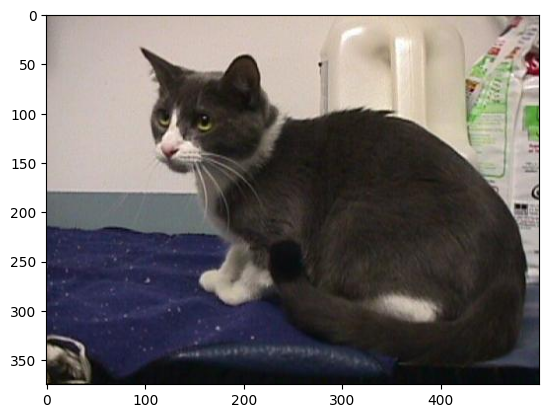

In [122]:
plt.imshow(cat)

In [123]:
cat.shape

(375, 500, 3)

In [124]:
dog = cv2.imread('data\\PetImages\\train\\Dog\\4.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

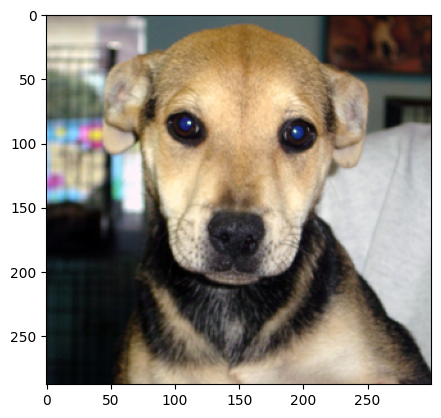

In [125]:
plt.imshow(dog)

In [126]:
dog.shape

(288, 300, 3)

In [127]:
from keras.preprocessing.image import ImageDataGenerator

In [128]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                                width_shift_range=0.1, # Shift the pic width by a max of 10%
                                height_shift_range=0.1, # Shift the pic height by a max of 10%
                                rescale=1/255, # Rescale the image by normalzing it.
                                shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                                zoom_range=0.2, # Zoom in by 20% max
                                horizontal_flip=True, # Allo horizontal flipping
                                fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                                )

In [129]:
image_gen.flow_from_directory('data\\PetImages\\train')

Found 17100 images belonging to 2 classes.


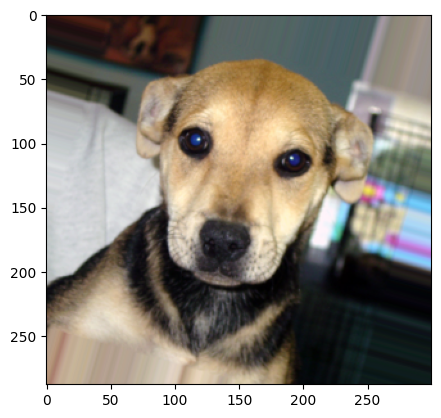

In [130]:
plt.imshow(image_gen.random_transform(dog))

In [131]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [132]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# OUTPUT LAYER
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [133]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [134]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('data\\PetImages\\train',
                                                target_size=(150,150),
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 17100 images belonging to 2 classes.


In [135]:
test_image_gen = image_gen.flow_from_directory('data\\PetImages\\test',
                                                target_size=(150,150),
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 7900 images belonging to 2 classes.


In [136]:
train_image_gen.class_indices

{'Cat': 0, 'Dog': 1}

In [137]:
result = model.fit(train_image_gen,epochs=4,
                                steps_per_epoch=150,
                                validation_data=test_image_gen,
                                validation_steps=12)


Epoch 1/4
150/150 [==============================] - 39s 254ms/step - loss: 0.7004 - accuracy: 0.5171 - val_loss: 0.6976 - val_accuracy: 0.4740
Epoch 2/4
150/150 [==============================] - 37s 250ms/step - loss: 0.6822 - accuracy: 0.5806 - val_loss: 0.6755 - val_accuracy: 0.5833
Epoch 3/4
150/150 [==============================] - 37s 249ms/step - loss: 0.6788 - accuracy: 0.5796 - val_loss: 0.6745 - val_accuracy: 0.5729
Epoch 4/4
150/150 [==============================] - 38s 253ms/step - loss: 0.6652 - accuracy: 0.5975 - val_loss: 0.6682 - val_accuracy: 0.6146


In [138]:
import random, os
import numpy as np
from keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 24ms/step
Cat


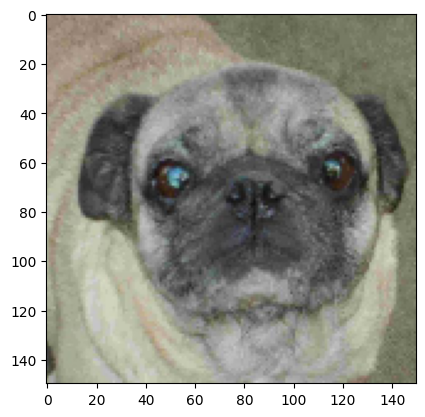

In [157]:
data_dir = 'data\\PetImages\\train'
dir = random.choice(os.listdir(data_dir))
image = random.choice(os.listdir(data_dir + '\\' + dir))
image = load_img(data_dir + '\\' + dir + '\\' + image, target_size=(150,150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image/255
plt.imshow(image[0])

pred = model.predict(image)
pred = np.argmax(pred)
categories = ['Cat', 'Dog']
print(categories[pred])
